**ANÁLISIS DE VENTAS: TIENDA WALMART**

In [125]:
#Carga de librerias

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
import tensorflow as tf
import seaborn as sns
sns.set()
%matplotlib inline

from datetime import datetime
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import AutoReg
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tools.eval_measures import rmse
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from math import sqrt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


**Análisis exploratorio**

*1) Carga de datos*

In [6]:
#Carga de dataset
data = pd.read_csv('Walmart_dataset_modificado.csv')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,08-01-2010,1425307.565,0,41.97,2.420,211.081890,7.545
1,1,15-01-2010,1360899.630,0,49.08,2.473,210.997826,7.545
2,1,22-01-2010,1346232.857,0,47.33,2.496,210.925603,7.545
3,1,29-01-2010,1318112.450,0,49.05,2.549,211.023576,7.545
4,1,05-02-2010,1643690.900,0,42.31,2.572,211.096358,8.106


*2) Inspección inicial*

In [7]:
#Información de la estructura de los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         156 non-null    int64  
 1   Date          156 non-null    object 
 2   Weekly_Sales  156 non-null    float64
 3   Holiday_Flag  156 non-null    int64  
 4   Temperature   156 non-null    float64
 5   Fuel_Price    156 non-null    float64
 6   CPI           156 non-null    float64
 7   Unemployment  156 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 9.9+ KB


In [8]:
#Verificar si hay filas duplicadas
data.duplicated().sum()

0

In [9]:
#Verificar si hay celdas vacías
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [11]:
#Analisis de variables numericas

data_num = data[["Weekly_Sales", "Temperature", "Fuel_Price", "CPI", "Unemployment"]]
data_num.head()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,1425307.565,41.97,2.420,211.081890,7.545
1,1360899.630,49.08,2.473,210.997826,7.545
2,1346232.857,47.33,2.496,210.925603,7.545
3,1318112.450,49.05,2.549,211.023576,7.545
4,1643690.900,42.31,2.572,211.096358,8.106


In [12]:
print (data_num.describe())

       Weekly_Sales  Temperature  Fuel_Price         CPI  Unemployment
count  1.560000e+02   156.000000  156.000000  156.000000    156.000000
mean   1.565936e+06    66.890192    3.222276  216.290285      7.548891
std    1.722914e+05    14.522686    0.435081    4.582083      0.440118
min    1.316899e+06    35.400000    2.420000  210.337426      6.573000
25%    1.456380e+06    54.500000    2.753000  211.529051      7.296750
50%    1.539824e+06    67.735000    3.309500  215.524203      7.742000
75%    1.625260e+06    80.422500    3.592500  221.379662      7.838000
max    2.387950e+06    91.650000    3.907000  223.444251      8.106000


In [10]:
#Verificar la presencia de outliers

def check_outliers(data):
    for i in data.columns:
        if data[i].dtype!= 'object':
            sns.boxplot(data[i])
            plt.title(i)
            plt.show()

c:\Users\JGEREZR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


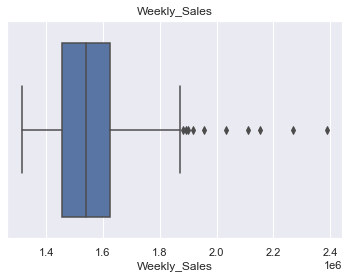

c:\Users\JGEREZR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


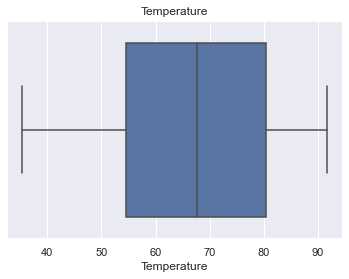

c:\Users\JGEREZR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


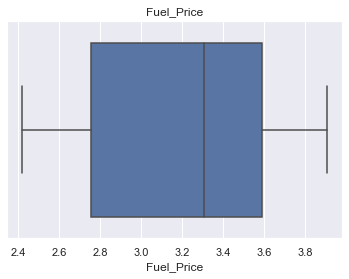

c:\Users\JGEREZR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


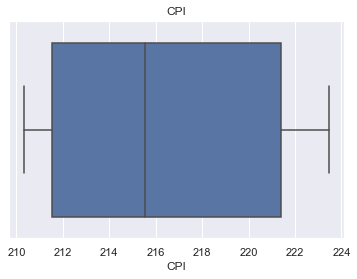

c:\Users\JGEREZR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


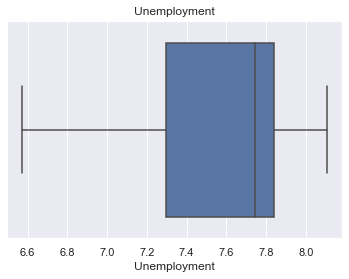

In [13]:
check_outliers (data_num)

C:\Users\JGEREZR\AppData\Local\Temp\ipykernel_6396\3743916429.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i] > upper_bound, upper_bound, data[i])
C:\Users\JGEREZR\AppData\Local\Temp\ipykernel_6396\3743916429.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i] < lower_bound, lower_bound, data[i])
c:\Users\JGEREZR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12,

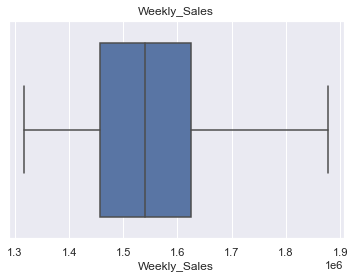

c:\Users\JGEREZR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


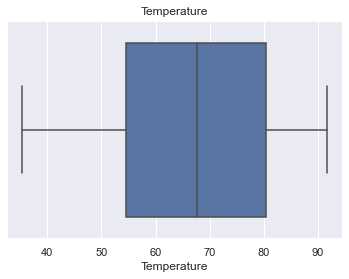

c:\Users\JGEREZR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


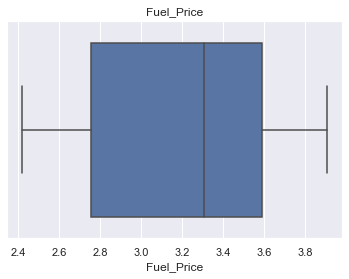

c:\Users\JGEREZR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


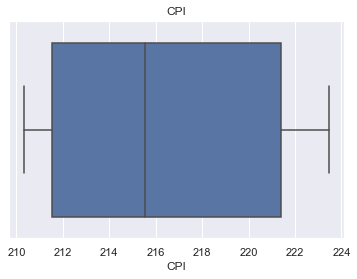

c:\Users\JGEREZR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


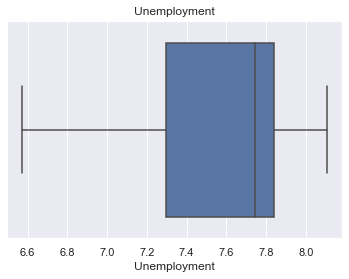

In [14]:
#Reemplazar outliers

def replace_outliers (data):
    for i in data.columns:
        if data[i].dtype!= 'object':
            q1 = data[i].quantile(0.25)
            q3 = data[i].quantile(0.75)
            iqr= q3-q1
            lower_bound = q1 - (1.5 * iqr) 
            upper_bound = q3 + (1.5 * iqr) 
            data[i] = np.where(data[i] > upper_bound, upper_bound, data[i]) 
            data[i] = np.where(data[i] < lower_bound, lower_bound, data[i]) 
    return data

data_num2 = replace_outliers(data_num)
check_outliers(data_num2)

In [15]:
#Se verifica que el maximo valor de las ventas fue reemplazado

print (data_num2.describe())

       Weekly_Sales  Temperature  Fuel_Price         CPI  Unemployment
count  1.560000e+02   156.000000  156.000000  156.000000    156.000000
mean   1.554953e+06    66.890192    3.222276  216.290285      7.548891
std    1.376559e+05    14.522686    0.435081    4.582083      0.440118
min    1.316899e+06    35.400000    2.420000  210.337426      6.573000
25%    1.456380e+06    54.500000    2.753000  211.529051      7.296750
50%    1.539824e+06    67.735000    3.309500  215.524203      7.742000
75%    1.625260e+06    80.422500    3.592500  221.379662      7.838000
max    1.878579e+06    91.650000    3.907000  223.444251      8.106000


In [24]:
data_num2["Weekly_Sales"].head()

0    1425307.565
1    1360899.630
2    1346232.857
3    1318112.450
4    1643690.900
Name: Weekly_Sales, dtype: float64

In [16]:
#Analisis de variables categoricas

data_categ = ["Store", "Holiday_Flag"]
print(data[data_categ].value_counts)

<bound method DataFrame.value_counts of      Store  Holiday_Flag
0        1             0
1        1             0
2        1             0
3        1             0
4        1             0
..     ...           ...
151      1             0
152      1             0
153      1             0
154      1             0
155      1             1

[156 rows x 2 columns]>


In [17]:
print(data["Holiday_Flag"].value_counts())

0    144
1     12
Name: Holiday_Flag, dtype: int64


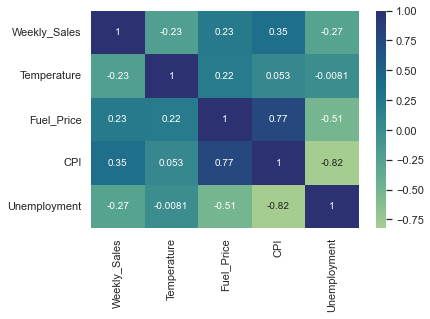

In [18]:
#Verificar si existe correlación entre las variables

corr = data[["Weekly_Sales", "Temperature", "Fuel_Price", "CPI", "Unemployment"]].corr() 
sns.heatmap(corr, annot = True, cmap = "crest")
plt.show()

In [19]:
#Verificar el formato de la columna Date

data.Date.head()

0    08-01-2010
1    15-01-2010
2    22-01-2010
3    29-01-2010
4    05-02-2010
Name: Date, dtype: object

In [20]:
#Modifico el formato de la columna Date

data["Date"] = pd.to_datetime(data["Date"], format='%d-%m-%Y')

In [21]:
data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')
print(data)

     Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0        1  2010-01-08   1425307.565             0       41.970       2.420   
1        1  2010-01-15   1360899.630             0       49.080       2.473   
2        1  2010-01-22   1346232.857             0       47.330       2.496   
3        1  2010-01-29   1318112.450             0       49.050       2.549   
4        1  2010-02-05   1643690.900             0       42.310       2.572   
..     ...         ...           ...           ...          ...         ...   
151      1  2012-11-30   1620134.120             0       49.090       3.582   
152      1  2012-12-07   1916750.510             0       49.090       3.580   
153      1  2012-12-14   1871318.410             0       45.130       3.592   
154      1  2012-12-21   2152427.780             0       50.735       3.588   
155      1  2012-12-28   1627605.430             1       50.145       3.586   

            CPI  Unemployment  
0    211.081890    

In [22]:
#Formato de la columna Date modificado

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         156 non-null    int64  
 1   Date          156 non-null    object 
 2   Weekly_Sales  156 non-null    float64
 3   Holiday_Flag  156 non-null    int64  
 4   Temperature   156 non-null    float64
 5   Fuel_Price    156 non-null    float64
 6   CPI           156 non-null    float64
 7   Unemployment  156 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 9.9+ KB


In [23]:
data.Date

0      2010-01-08
1      2010-01-15
2      2010-01-22
3      2010-01-29
4      2010-02-05
          ...    
151    2012-11-30
152    2012-12-07
153    2012-12-14
154    2012-12-21
155    2012-12-28
Name: Date, Length: 156, dtype: object

In [31]:
#Creacion de un dataset con las columnas Fecha y Ventas (Ventas con outliers)

df = pd.DataFrame({'Fecha': data['Date'],'Ventas': data['Weekly_Sales']})
df.head()

,Fecha,Ventas
0,2010-01-08,1425307.565
1,2010-01-15,1360899.630
2,2010-01-22,1346232.857
3,2010-01-29,1318112.450
4,2010-02-05,1643690.900


In [32]:
#Creacion de un dataset con las columnas Fecha y Ventas (Ventas sin outliers)

df2 = pd.DataFrame({'Fecha': data['Date'],'Ventas': data_num2['Weekly_Sales']})
df2.head()

,Fecha,Ventas
0,2010-01-08,1425307.565
1,2010-01-15,1360899.630
2,2010-01-22,1346232.857
3,2010-01-29,1318112.450
4,2010-02-05,1643690.900


In [34]:
df.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fecha   156 non-null    object 
 1   Ventas  156 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fecha   156 non-null    object 
 1   Ventas  156 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.6+ KB


In [35]:
df['Fecha'] = pd.to_datetime(df['Fecha'])
df2['Fecha'] = pd.to_datetime(df2['Fecha'])

In [36]:
df.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   156 non-null    datetime64[ns]
 1   Ventas  156 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   156 non-null    datetime64[ns]
 1   Ventas  156 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.6 KB


In [37]:
df.head()

,Fecha,Ventas
0,2010-01-08,1425307.565
1,2010-01-15,1360899.630
2,2010-01-22,1346232.857
3,2010-01-29,1318112.450
4,2010-02-05,1643690.900


In [38]:
df2.head()

,Fecha,Ventas
0,2010-01-08,1425307.565
1,2010-01-15,1360899.630
2,2010-01-22,1346232.857
3,2010-01-29,1318112.450
4,2010-02-05,1643690.900


In [49]:
len(df)

156

*3) Visualización de datos*

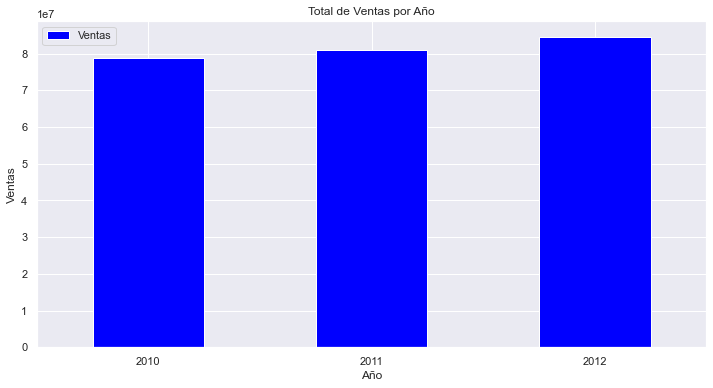

In [44]:
#Total de ventas agrupadas por año

data_agrupada_year = df.groupby(df['Fecha'].dt.to_period('Y')).sum()

#Gráfico de barras para la suma de ventas por mes
data_agrupada_year.plot(kind='bar', figsize=(12, 6), color= "blue")

plt.xlabel('Año')
plt.ylabel('Ventas')
plt.title('Total de Ventas por Año')
plt.xticks(rotation=0)

plt.show()

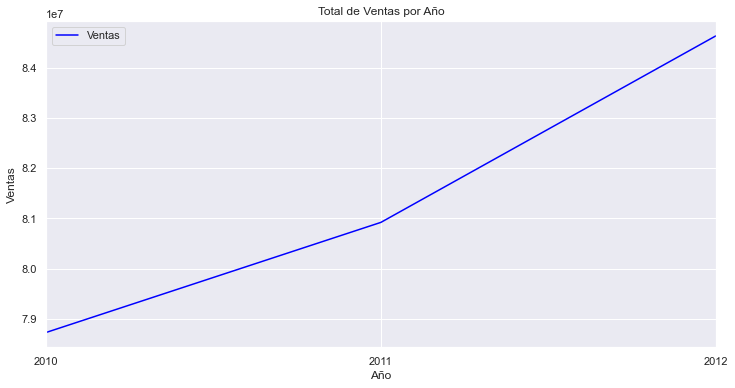

In [45]:
#Total de ventas agrupadas por año

data_agrupada_year1 = df.groupby(df['Fecha'].dt.to_period('Y')).sum()

#Gráfico de lineas para la suma de ventas por mes
data_agrupada_year1.plot(kind='line', figsize=(12, 6), color= "blue")

plt.xlabel('Año')
plt.ylabel('Ventas')
plt.title('Total de Ventas por Año')

plt.show()

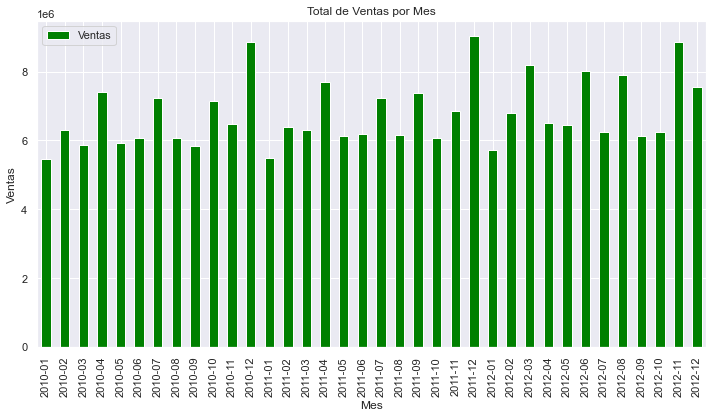

In [46]:
#Total de ventas agrupadas por mes
data_agrupada_month = df.groupby(df['Fecha'].dt.to_period('M')).sum()

#Gráfico de barras para la suma de ventas por mes
data_agrupada_month.plot(kind='bar', figsize=(12, 6), color= "green")

plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Total de Ventas por Mes')

plt.show()

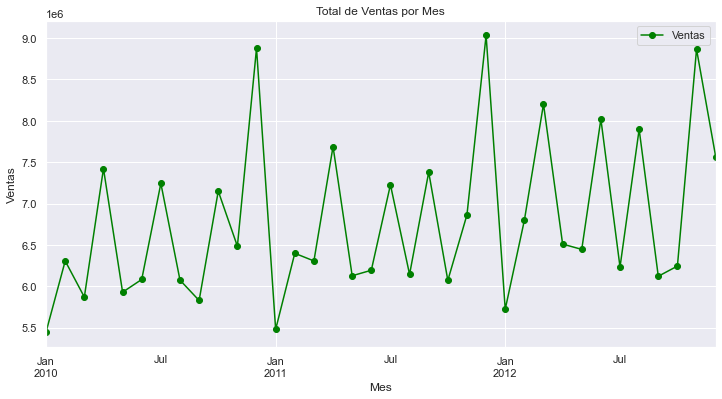

In [47]:
#Total de ventas agrupadas por mes
data_agrupada_month1 = df.groupby(df['Fecha'].dt.to_period('M')).sum()

#Gráfico de barras para la suma de ventas por mes
data_agrupada_month1.plot(kind='line', figsize=(12, 6), color= "green", marker='o', linestyle='-' )

plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Total de Ventas por Mes')

plt.show()

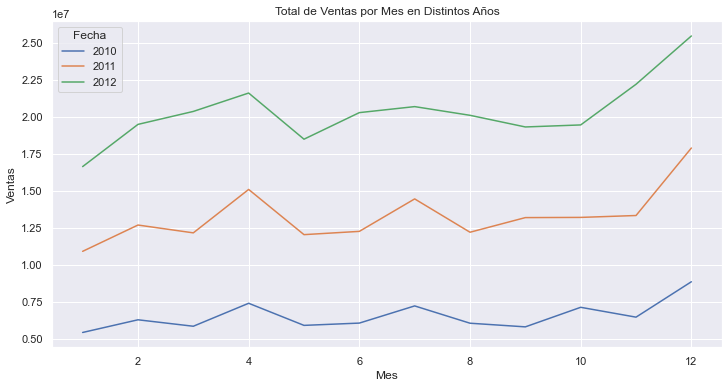

In [50]:
#Total de ventas agrupadas por mes y año

data_agrupada = df.groupby([df['Fecha'].dt.month, df['Fecha'].dt.year])['Ventas'].sum()

# Gráfico de linea para la suma de ventas por mes en distintos años

data_agrupada.unstack().plot(kind='line', stacked=True, figsize=(12, 6))

plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Total de Ventas por Mes en Distintos Años')

plt.show()

Quiero observar si la temperatura puede llegar a afectar la venta

In [57]:
df_temp = pd.DataFrame({'Fecha': df['Fecha'],'Temperatura': data['Temperature']})
df_temp.head()

,Fecha,Temperatura
0,2010-01-08,41.97
1,2010-01-15,49.08
2,2010-01-22,47.33
3,2010-01-29,49.05
4,2010-02-05,42.31


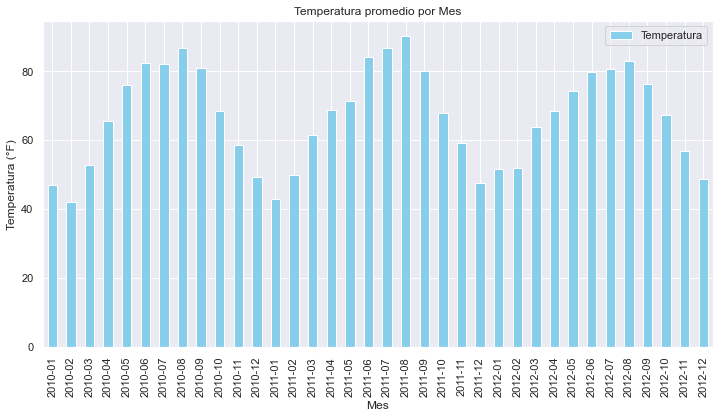

In [61]:
#Temperatura promedio por mes
data_agrupada_month_temp = df_temp.groupby(df_temp['Fecha'].dt.to_period('M')).mean()

#Gráfico de barras para la suma de ventas por mes
data_agrupada_month_temp.plot(kind='bar', figsize=(12, 6), color= "skyblue")

plt.xlabel('Mes')
plt.ylabel('Temperatura (°F)')
plt.title('Temperatura promedio por Mes')

plt.show()

Continuamos con los graficos

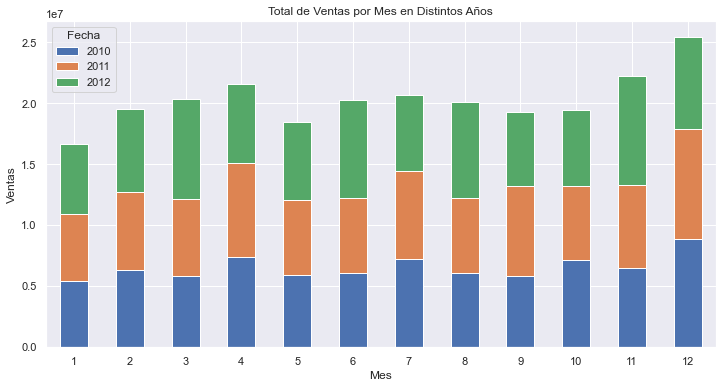

In [62]:
#Total de ventas agrupadas por mes y año

data_agrupada1 = df.groupby([df['Fecha'].dt.month, df['Fecha'].dt.year])['Ventas'].sum()

# Gráfico de barras para la suma de ventas por mes en distintos años

data_agrupada1.unstack().plot(kind='bar', stacked=True, figsize=(12, 6))

plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Total de Ventas por Mes en Distintos Años')
plt.xticks(rotation=0)

plt.show()

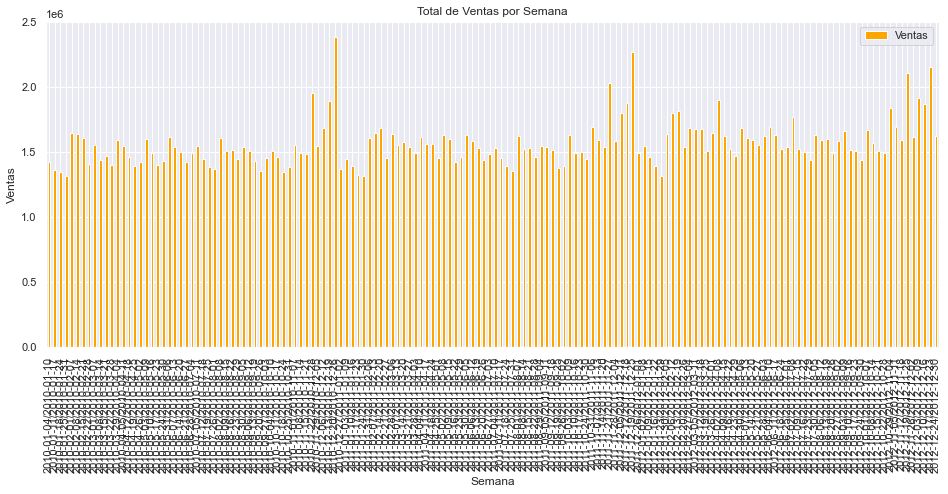

In [65]:
#Total de ventas agrupadas por semana
data_agrupada_week = df.groupby(df['Fecha'].dt.to_period('W')).sum()

#Gráfico de barras para la suma de ventas por semana
data_agrupada_week.plot(kind='bar', figsize=(16, 6), color= "orange")

plt.xlabel('Semana')
plt.ylabel('Ventas')
plt.title('Total de Ventas por Semana')

plt.show()

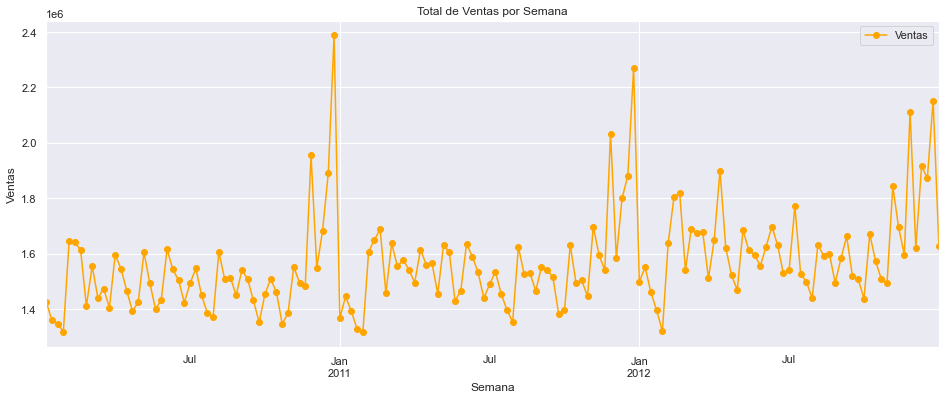

In [66]:
#Total de ventas agrupadas por semana
data_agrupada_week1 = df.groupby(df['Fecha'].dt.to_period('W')).sum()

#Gráfico de linea para la suma de ventas por semana
data_agrupada_week1.plot(kind='line', figsize=(16, 6), color= "orange", marker='o', linestyle='-')

plt.xlabel('Semana')
plt.ylabel('Ventas')
plt.title('Total de Ventas por Semana')

plt.show()

C:\Users\JGEREZR\AppData\Local\Temp\ipykernel_6396\1750439783.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data_agrupada2 = df.groupby([df['Fecha'].dt.week, df['Fecha'].dt.year])['Ventas'].sum()


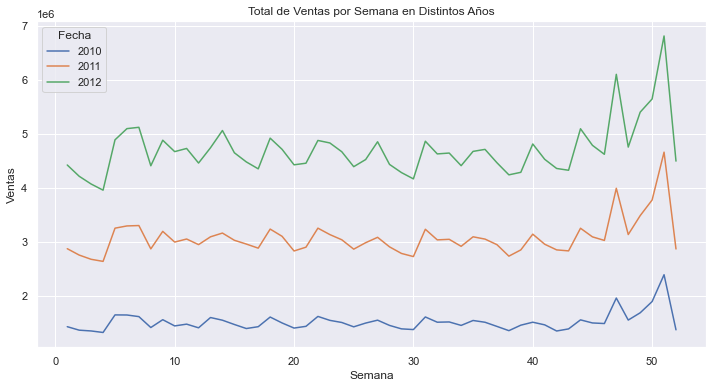

In [67]:
#Total de ventas agrupadas por semana en distintos años

data_agrupada2 = df.groupby([df['Fecha'].dt.week, df['Fecha'].dt.year])['Ventas'].sum()

# Gráfico de lineas para las ventas por semana en distintos años

data_agrupada2.unstack().plot(kind='line', stacked=True, figsize=(12, 6))

plt.xlabel('Semana')
plt.ylabel('Ventas')
plt.title('Total de Ventas por Semana en Distintos Años')
plt.xticks(rotation=0)

plt.show()

C:\Users\JGEREZR\AppData\Local\Temp\ipykernel_6396\114474933.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data_agrupada3 = df.groupby([df['Fecha'].dt.week, df['Fecha'].dt.year])['Ventas'].sum()


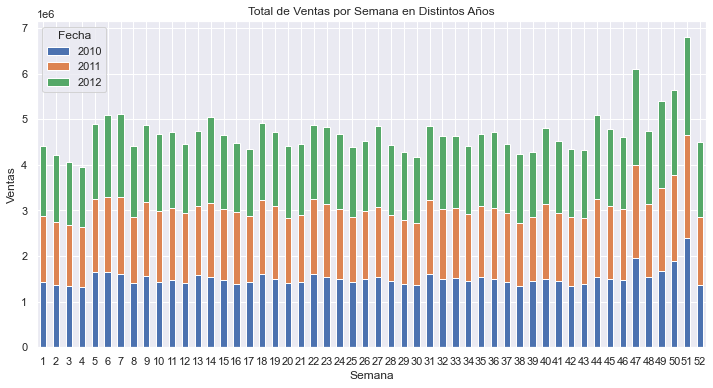

In [68]:
#Total de ventas agrupadas por semana en distintos años

data_agrupada3 = df.groupby([df['Fecha'].dt.week, df['Fecha'].dt.year])['Ventas'].sum()

# Gráfico de barra para las ventas por semana en distintos años

data_agrupada3.unstack().plot(kind='bar', stacked=True, figsize=(12, 6))

plt.xlabel('Semana')
plt.ylabel('Ventas')
plt.title('Total de Ventas por Semana en Distintos Años')
plt.xticks(rotation=0)

plt.show()

*5) Análisis de relaciones*

In [76]:
#Convierto la fecha en el indice

df.set_index('Fecha', inplace=True)

In [82]:
df.head()

,Ventas
Fecha,
2010-01-08,1425307.565
2010-01-15,1360899.630
2010-01-22,1346232.857
2010-01-29,1318112.450
2010-02-05,1643690.900


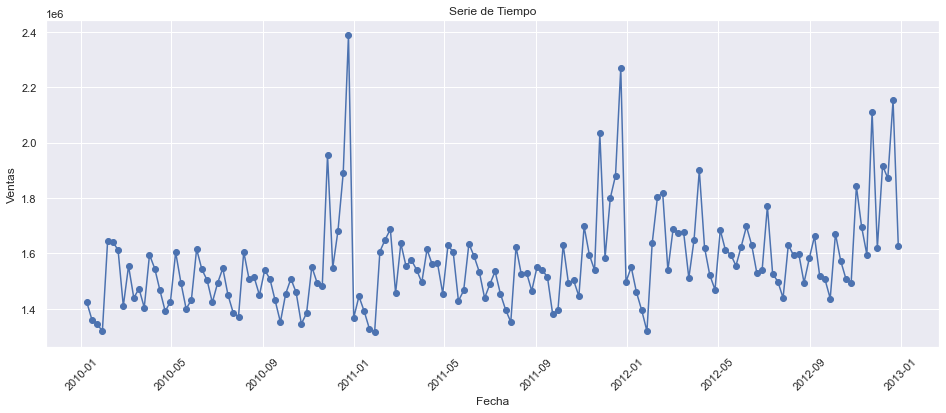

In [93]:
# Visualizacion de la serie de tiempo

plt.figure(figsize=(16, 6))
plt.plot(df, marker='o', linestyle='-')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Serie de Tiempo')
plt.xticks(rotation=45)
plt.show()

*Descomposición de la serie temporal*

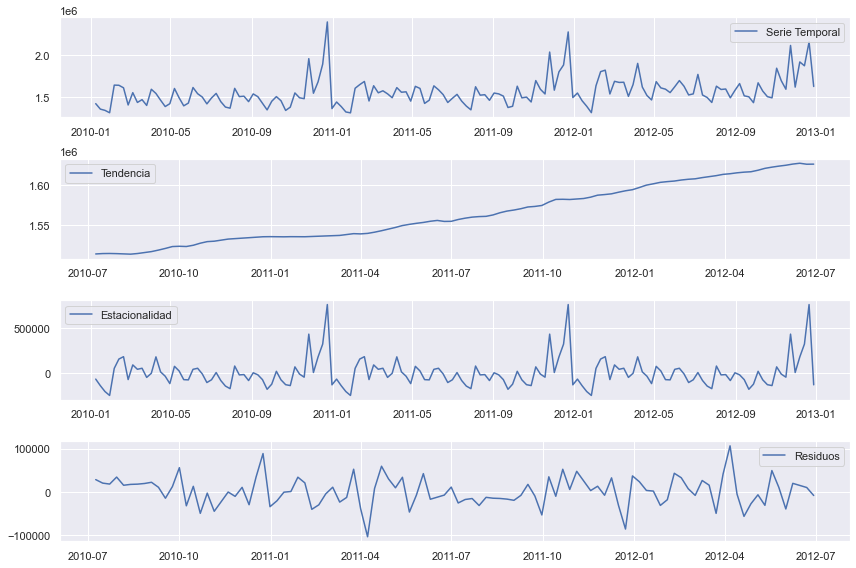

In [94]:
decomposition = seasonal_decompose(df, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df, label='Serie Temporal')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Tendencia')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Estacionalidad')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuos')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

*Histograma y gráfico de densidad de los datos*

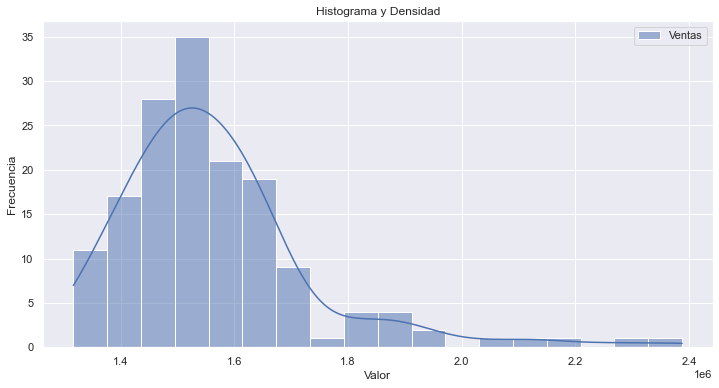

In [95]:
plt.figure(figsize=(12, 6))
sns.histplot(df, kde=True)
plt.title('Histograma y Densidad')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

*Gráfico de autocorrelación (ACF) y autocorrelación parcial (PACF)*

*Autocorrelación (ACF) _ Parámetros q (orden de la media móvil)*

*Autocorrelación Parcial (PACF) _ Parámetros p (número de términos autorregresivos)*

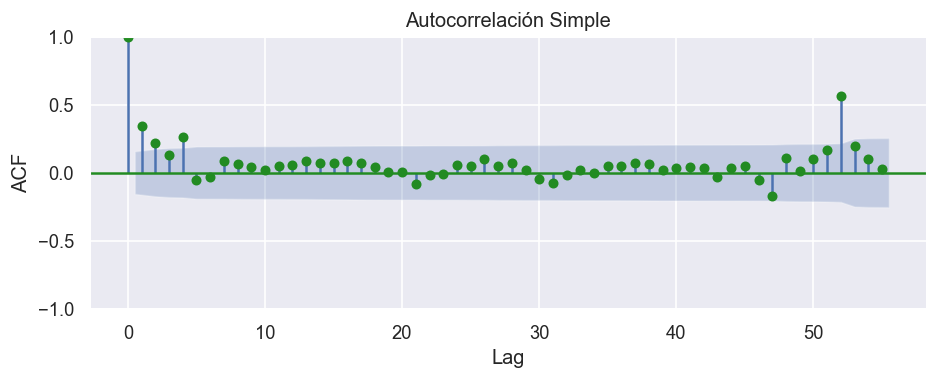

In [108]:
#Autocorrelacion (ACF)

plt.rcParams.update({'figure.figsize': (9,3), 'figure.dpi' :120})
sm.graphics.tsa.plot_acf(df, lags=55, color= "forestgreen")
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelación Simple')
plt.show()

c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


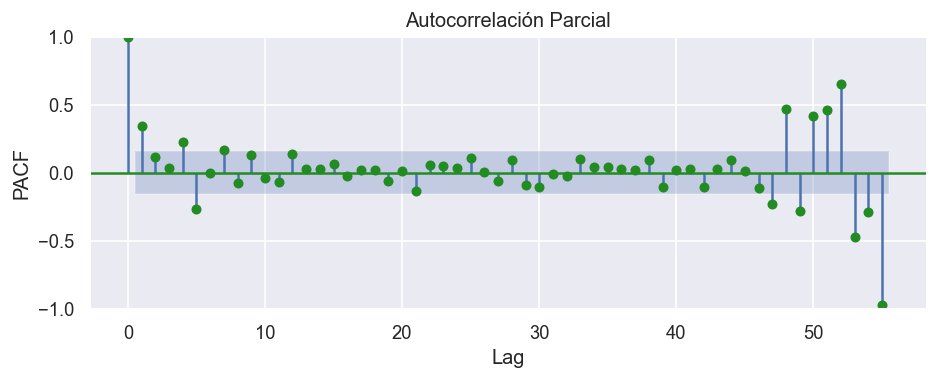

In [109]:
#Autocorrelacion parcial (pacf)

plt.rcParams.update({'figure.figsize': (9,3), 'figure.dpi' :120})
sm.graphics.tsa.plot_pacf(df, lags=55, color= "forestgreen" )
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('Autocorrelación Parcial')
plt.show()

Parámetro q = 52

Parámetro p = 52

AR(48), AR(51), AR(52), AR(55)

Estadísticas resumidas

In [110]:
print(df.describe())

             Ventas
count  1.560000e+02
mean   1.565936e+06
std    1.722914e+05
min    1.316899e+06
25%    1.456380e+06
50%    1.539824e+06
75%    1.625260e+06
max    2.387950e+06


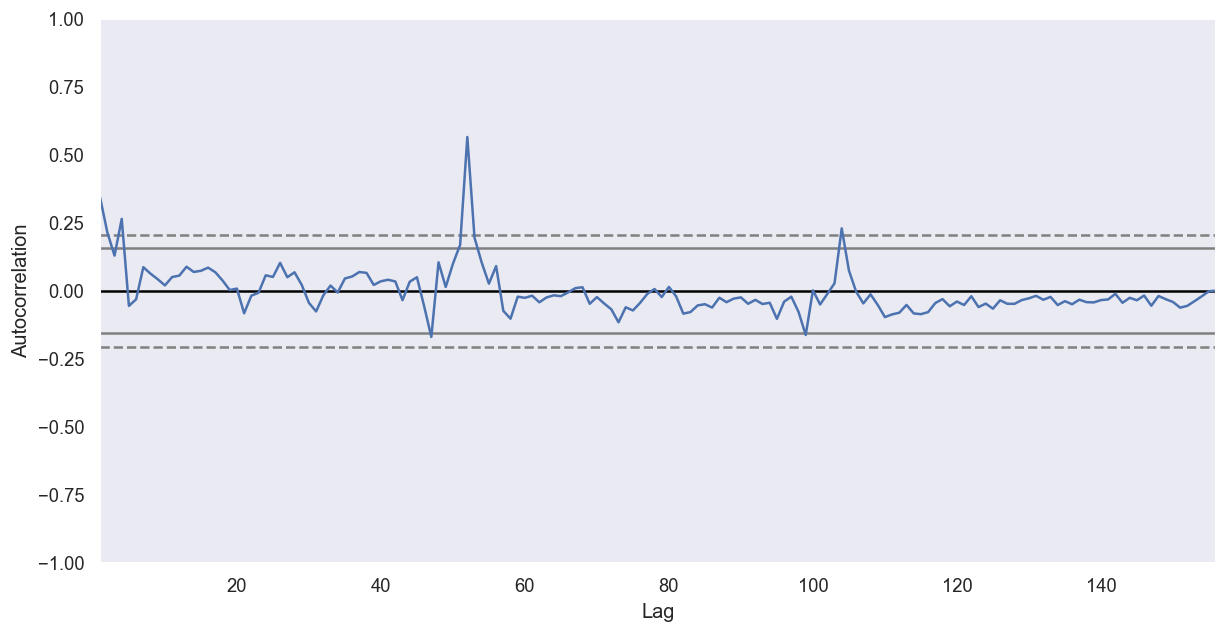

In [112]:
#Autocorrelación
plt.figure(figsize=(12, 6))
autocorrelation_plot(df)
pyplot.show()

*Prueba Dickey-Fuller para verificar si la serie posee estacionariedad*

In [117]:
result = sm.tsa.adfuller(df)

#Extraemos los resultados de la prueba
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print('Estadísticas de la prueba Dickey-Fuller:')
print("Estadístico de prueba:", adf_statistic)
print("Valor p:", p_value)
print("Valores críticos:")
for key, value in critical_values.items():
    print(f"{key}: {value}")

Estadísticas de la prueba Dickey-Fuller:
Estadístico de prueba: -4.372461598766522
Valor p: 0.00033197442241564924
Valores críticos:
1%: -3.4744158894942156
5%: -2.880878382771059
10%: -2.577081275821236


In [115]:
#Verificamos el resultado de la prueba
if p_value <= 0.05:
    print("La serie de tiempo es estacionaria (no hay raíces unitarias).")
else:
    print("La serie de tiempo no es estacionaria (hay raíces unitarias).")

La serie de tiempo es estacionaria (no hay raíces unitarias).


*Por lo tanto, se puede concluir que la serie de tiempo es estacionaria. Es decir, que no hay estacionalidad ni tendencias significativas.* 

Parámetro d (Orden de diferenciación para hacer la serie estacionaria)
d=0 serie estacionaria

*División de dataset: datos de entrenamiento y testeo*

A continuación, podemos dividir el dataset en un conjunto de datos de entrenamiento y de prueba.
Es decir, usar el conjunto de entrenamiento para ajustar el modelo y generar una predicción para cada elemento en el conjunto de prueba.

In [119]:
# Dividir los datos
train_data = df[:-31]  # Utiliza los primeros n-1 datos para entrenar
test_data = df[-31:]   # Utiliza los últimos n datos para probar

In [121]:
print("Datos de entrenamiento:", len(train_data))
print("Datos de prueba:", len(test_data))

Datos de entrenamiento: 125
Datos de prueba: 31


In [123]:
historia = [x for x in train_data]
predictions = list()

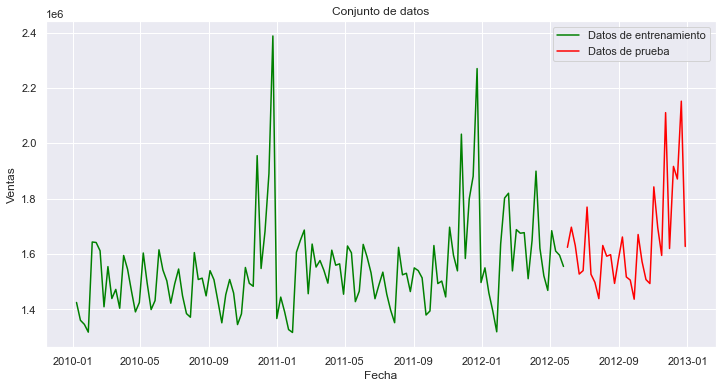

In [151]:
#Visualizar los resultados
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Datos de entrenamiento', color ='green' )
plt.plot(test_data, label='Datos de prueba', color='red')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Conjunto de datos')
plt.legend()
plt.show()

**MODELO AUTORREGRESIVO (AR)**

c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


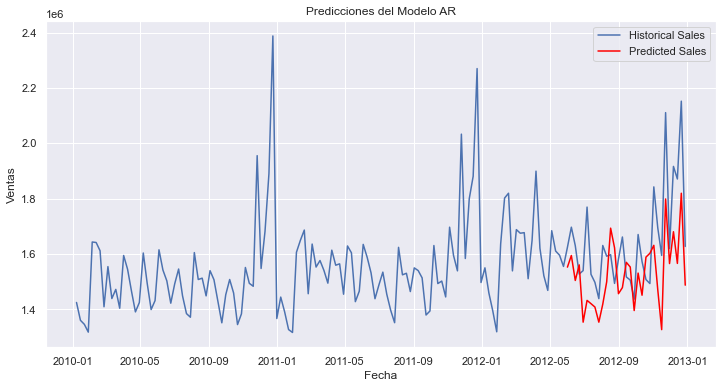

In [157]:
# Construir el modelo AutoReg
lags = 48  # Número de retardos en el modelo AR 52
model = AutoReg(train_data, lags=lags)
fitted_model = model.fit()

# Hacer predicciones
predictions = fitted_model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

# Visualizar los resultados
plt.figure(figsize=(12, 6))
plt.plot(df, label='Historical Sales')
plt.plot(test_data.index, predictions, color='red', label='Predicted Sales')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Predicciones del Modelo AR')
plt.legend()
plt.show()

In [158]:
#summary of fit model
print(fitted_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                 Ventas   No. Observations:                  125
Model:                    AutoReg(48)   Log Likelihood               -1011.288
Method:               Conditional MLE   S.D. of innovations         122353.204
Date:                Sun, 03 Sep 2023   AIC                           2122.575
Time:                        00:42:19   BIC                           2239.766
Sample:                    12-10-2010   HQIC                          2169.450
                         - 05-25-2012                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.733e+06   1.05e+06      1.647      0.099   -3.29e+05     3.8e+06
Ventas.L1      0.5284      0.103      5.136      0.000       0.327       0.730
Ventas.L2      0.0225      0.104      0.217      0.8

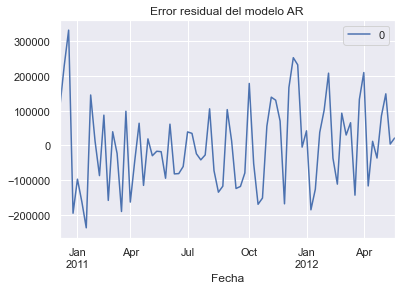

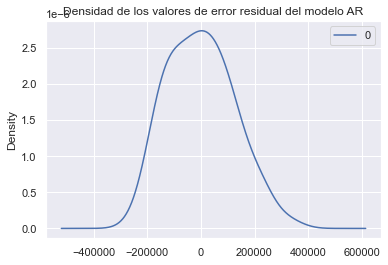

                  0
count  7.700000e+01
mean   1.530030e-09
std    1.231555e+05
min   -2.367835e+05
25%   -9.709373e+04
50%   -5.000928e+03
75%    8.683234e+04
max    3.309822e+05


In [159]:
# line plot of residuals
residuals = DataFrame(fitted_model.resid)
residuals.plot()
plt.title('Error residual del modelo AR')
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.title('Densidad de los valores de error residual del modelo AR')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

Los resultados muestran una media igual a cero en los valores residuales. Buen ajuste del Modelo

In [160]:
#Calculo del error del modelo: RMSE (evaluate forecasts)
rmse = sqrt(mean_squared_error(test_data, predictions))
print('Test RMSE: %.3f' % rmse)

#Calculo del error cuadratico medio del modelo: MSE (evaluate forecasts)
mse = mean_squared_error(test_data, predictions)
print('Test MSE: %.3f' % mse)

#Calculo del error absoluto medio del modelo: MAE (evaluate forecasts)
mae = mean_absolute_error(test_data, predictions)
print('Test MAE: %.3f' % mae)

#Calculo del error porcentual Absoluto Medio del modelo: MAPE (evaluate forecasts)
mape = mean_absolute_percentage_error(test_data, predictions)
print('Test MAPE: %.3f' % mape)

aic = fitted_model.aic
print(f'Valor del AIC: {aic}')

Test RMSE: 174153.877
Test MSE: 30329572838.373
Test MAE: 149911.000
Test MAPE: 0.088
Valor del AIC: 2122.5752909907196


**MODELO AUTORREGRESIVO INTEGRADO DE MEDIA MOVIL (ARIMA)**

c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\JGEREZR\anaconda3\lib\site-packages\statsmodels\base\model.py

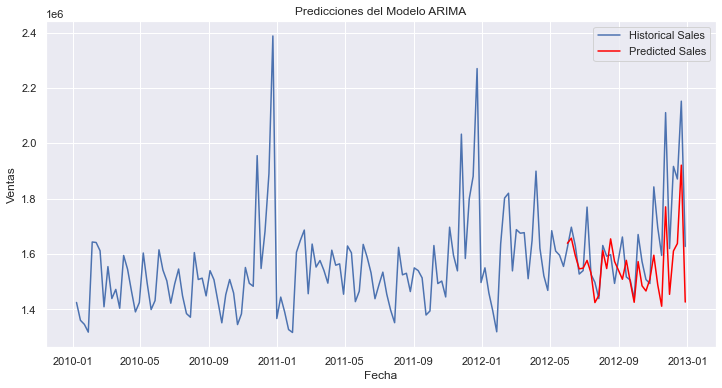

In [161]:
# Construir el modelo ARIMA
order = (52, 0, 52)  # Orden del modelo (p, d, q)
model2 = sm.tsa.ARIMA(train_data, order=order)
#Ajustar el modelo a los datos
fitted_model2 = model2.fit()
# Hacer predicciones del modelo
predictions2 = fitted_model2.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False, typ='levels')
#Visualizar los resultados
plt.figure(figsize=(12, 6))
plt.plot(df, label='Historical Sales')
plt.plot(test_data.index, predictions2, label='Predicted Sales', color='red')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Predicciones del Modelo ARIMA')
plt.legend()
plt.show()

In [148]:
#summary of fit model
print(fitted_model2.summary())

                               SARIMAX Results                                
Dep. Variable:                 Ventas   No. Observations:                  125
Model:               ARIMA(52, 0, 52)   Log Likelihood               -1633.372
Date:                Sun, 03 Sep 2023   AIC                           3478.745
Time:                        00:28:00   BIC                           3778.546
Sample:                    01-08-2010   HQIC                          3600.538
                         - 05-25-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.547e+06   2.83e+05      5.472      0.000    9.93e+05     2.1e+06
ar.L1          0.0663    318.207      0.000      1.000    -623.608     623.740
ar.L2          0.0787     80.315      0.001      0.9

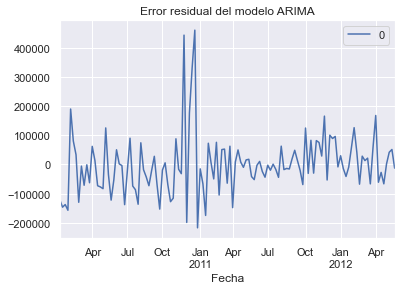

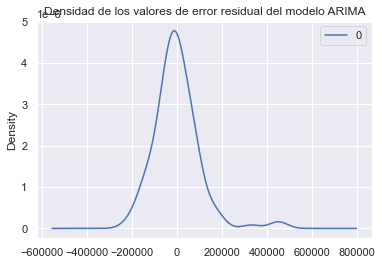

                   0
count     125.000000
mean     -952.784568
std    101729.627586
min   -217264.558094
25%    -62843.254888
50%     -9929.370142
75%     49623.562609
max    460062.504183


In [149]:
# line plot of residuals
residuals2 = DataFrame(fitted_model2.resid)
residuals2.plot()
plt.title('Error residual del modelo ARIMA')
pyplot.show()
# density plot of residuals
residuals2.plot(kind='kde')
plt.title('Densidad de los valores de error residual del modelo ARIMA')
pyplot.show()
# summary stats of residuals
print(residuals2.describe())

In [162]:
#Calculo del error del modelo: RMSE (evaluate forecasts)
rmse2 = sqrt(mean_squared_error(test_data, predictions2))
print('Test RMSE: %.3f' % rmse2)

#Calculo del error cuadratico medio del modelo: MSE (evaluate forecasts)
mse2 = mean_squared_error(test_data, predictions2)
print('Test MSE: %.3f' % mse2)

#Calculo del error absoluto medio del modelo: MAE (evaluate forecasts)
mae2 = mean_absolute_error(test_data, predictions2)
print('Test MAE: %.3f' % mae2)

#Calculo del error porcentual Absoluto Medio del modelo: MAPE (evaluate forecasts)
mape2 = mean_absolute_percentage_error(test_data, predictions2)
print('Test MAPE: %.3f' % mape2)

aic2 = fitted_model2.aic
print(f'Valor del AIC: {aic2}')

Test RMSE: 142301.301
Test MSE: 20249660383.092
Test MAE: 104048.459
Test MAPE: 0.059
Valor del AIC: 3473.1835190249058
